# Appendix A.2 - NumPy

NumPy is the fundamental **library for scientific computing** with Python. NumPy is centered around a powerful n-dimensional array object, and it also contains useful linear algebra, Fourier transform, and random number functions.

Some vocabulary:
- each dimension is called an **axis**
- the number of axes is called the **rank**
- an array's list of axis lengths is called the **shape** of a data structure
- the **size** of an array is the total number of elements, which is the product of all axis lengths

The actual data of a numpy array is stored in a **homogeneous and contiguous block of memory** called data buffer. The following figure show the data structure of a NumPy array:

![](images/numpy-data-structure.png)

## Creating arrays

Now let's import numpy. Most people import it as np:

In [1]:
import numpy as np

### np.zeros
The **zero()** function creates an array containing any number of zeros:

In [2]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

To create a 2D array (ie. a matrix) we can provide a tuple with the desired number of rows and columns:

In [3]:
a = np.zeros((3,4))
print(a)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
print('shape:', a.shape)
print('dim:',  a.ndim)
print('size:',  a.size)

shape: (3, 4)
dim: 2
size: 12


We can also create **n-dimensional array** of arbitrary rank: 

In [6]:
np.zeros((2,3,4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

![](images/numpy-array.png)

### np.ones

In [7]:
np.ones((3,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

### np.full
Creates an array of the given shape initialized with the given value.

In [8]:
np.full((3,4), np.pi)

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265]])

### np.empty
An uninitialized array (its content is not predictable, as it is whatever is in memory at that point).

In [10]:
np.empty((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

### np.array
Of course we can initialize an array using a regular python array

In [11]:
np.array([[1,2,3,4], [10, 20, 30, 40]])

array([[ 1,  2,  3,  4],
       [10, 20, 30, 40]])

### np.arange
We can create an array providing the range of values (also float and providing a step). When dealing with floats, the exact number of elements in the array is not always predictible.

In [12]:
np.arange(1, 5)

array([1, 2, 3, 4])

In [13]:
np.arange(1.0, 5.0)

array([1., 2., 3., 4.])

In [14]:
np.arange(1, 5, 0.5)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [15]:
print(np.arange(0, 5/3, 1/3)) # depending on floating point errors, the max value is 4/3 or 5/3.
print(np.arange(0, 5/3, 0.333333333))
print(np.arange(0, 5/3, 0.333333334))

[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]
[0.         0.33333333 0.66666667 1.         1.33333334]


### np.linspace
It is generally preferable to use the linspace function instead of arange when working with floats. It returns an array containing a specific number of points evenly distributed between two values (note that the maximum value is included):

In [16]:
print(np.linspace(0, 5/3, 6))

[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]


### np.rand
A number of functions are available in NumPy's random module to create arrays initialized with random values.
Here a matrix initialized with random floats with **uniform distribution**:

In [17]:
np.random.rand(3,4)

array([[0.19580682, 0.47781294, 0.97437736, 0.14346198],
       [0.9037705 , 0.0214349 , 0.01646598, 0.28695335],
       [0.32948604, 0.88304304, 0.13886305, 0.64746271]])

Here a matrix containing random floats sampled from a **normal distribution**:

In [18]:
np.random.randn(3,4)

array([[ 0.3451151 , -1.96723073, -1.02434271, -0.18081974],
       [-0.10349762,  0.16449325, -0.06337146, -0.21603675],
       [-1.92258343, -0.39003423, -0.65587977,  0.30343546]])

To get a feel of these distributions, we can use matplotlib:

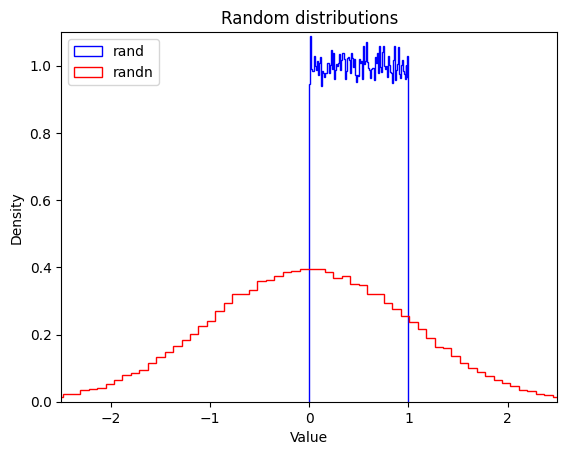

In [19]:
import matplotlib.pyplot as plt

plt.hist(np.random.rand(100000), density=True, bins=100, histtype="step", color="blue", label="rand")
plt.hist(np.random.randn(100000), density=True, bins=100, histtype="step", color="red", label="randn")
plt.axis([-2.5, 2.5, 0, 1.1])
plt.legend(loc = "upper left")
plt.title("Random distributions")
plt.xlabel("Value")
plt.ylabel("Density")

plt.show()

### np.fromfunction
You can also initialize an array using a function. The function is called with n parameters, where n is the rank of shape. The resulting array therefore has a value f(x, y) at coordinate (x, y).

In [20]:
def my_function(x,y):
    return x * y

np.fromfunction(my_function, (3, 4))

array([[0., 0., 0., 0.],
       [0., 1., 2., 3.],
       [0., 2., 4., 6.]])

## Array data

### dtype
NumPy's array are efficient in part because all their elements must have the same type (usually numbers). Available data types include **int8**, **int16**, **int32**, **int64**, **uint8|16|32|64**, **float16|32|64** and **complex64|128**. You can check what the data type is by looking at the dtype attribute. 

In [21]:
c = np.arange(1, 5)
print(c.dtype, c)

int64 [1 2 3 4]


In [22]:
c = np.arange(1.0, 5.0)
print(c.dtype, c)

float64 [1. 2. 3. 4.]


Instead of letting NumPy guess what data type to use, you can set it explicitly when creating an array by setting the dtype parameter

In [24]:
d = np.arange(1, 5, dtype=np.int8)
print(d.dtype, d)

int8 [1 2 3 4]


### itemsize
The itemsize attribute returns the size (in bytes) of each item:

In [26]:
e = np.arange(1, 5, dtype=np.int16)
e.itemsize

2

### data buffer
An array is actually stored in memory as a **flat (one dimensional) byte buffer**. It is available via the data attribute (we will rarely need it).

In [27]:
f = np.array([[1,2],[1000, 2000]], dtype=np.int32)

data_bytes = f.data.tobytes()
print(data_bytes)

b'\x01\x00\x00\x00\x02\x00\x00\x00\xe8\x03\x00\x00\xd0\x07\x00\x00'


## Reshaping an array

### In place
Changing the shape of an array is as simple as setting its shape attribute. However, the array's size must remain the same.

In [29]:
g = np.arange(24)

print(g)
print("Rank:", g.ndim)
print("Size:", g.size)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Rank: 1
Size: 24


In [30]:
g.shape = (6, 4)

print(g)
print("Rank:", g.ndim)
print("Size:", g.size)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
Rank: 2
Size: 24


In [31]:
g.shape = (2, 3, 4)

print(g)
print("Rank:", g.ndim)
print("Size:", g.size)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
Rank: 3
Size: 24


### reshape
The reshape function returns a new array pointing at the **same data**. This means that modifying one array will also modify the other.

In [32]:
g2 = g.reshape(4,6)

print(g2)
print("Rank:", g2.ndim)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
Rank: 2


Set item at row 1, col 2 to 999

In [33]:
g2[1, 2] = 999
print(g2)

[[  0   1   2   3   4   5]
 [  6   7 999   9  10  11]
 [ 12  13  14  15  16  17]
 [ 18  19  20  21  22  23]]


The corresponding element in g has been modified.

In [34]:
print(g)

[[[  0   1   2   3]
  [  4   5   6   7]
  [999   9  10  11]]

 [[ 12  13  14  15]
  [ 16  17  18  19]
  [ 20  21  22  23]]]


![](images/numpy-reshape.png)

### ravel
Finally, the ravel function returns a new one-dimensional array that also points to the same data:

In [35]:
g3 = g.ravel()

print(g3)

[  0   1   2   3   4   5   6   7 999   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23]


## Mathematical functions

### Arithmetic operations
All the usual arithmetic operators (+, -, /, //, etc.) can be used with array. They apply **elementwise**. Note that the multiplication is **not** a matrix multiplication. We will discuss matrix operations below. The arrays must have the same shape. If they do not, NumPy will apply the **broadcasting rules**.

In [36]:
a = np.array([14, 23, 32, 41])
b = np.array([5,  4,  3,  2])

print("a + b  =", a + b)
print("a - b  =", a - b)
print("a * b  =", a * b)
print("a / b  =", a / b)
print("a // b  =", a // b)
print("a % b  =", a % b)
print("a ** b =", a ** b)

a + b  = [19 27 35 43]
a - b  = [ 9 19 29 39]
a * b  = [70 92 96 82]
a / b  = [ 2.8         5.75       10.66666667 20.5       ]
a // b  = [ 2  5 10 20]
a % b  = [4 3 2 1]
a ** b = [537824 279841  32768   1681]


### Broadcasting

In general, NumPy expects arrays of the same shape. Broadcasting allows operations to be performed on arrays of different sizes. for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:

In [41]:
a = np.array([0, 1, 2])

a + 5

array([5, 6, 7])

We can think of this as an operation that stretches or duplicates the value 5 into the array [5, 5, 5], and adds the results. The advantage of NumPy's broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about it

![](images/numpy-broadcasting-one.png)

We can similarly extend this to arrays of higher dimension. Observe the result when we add a one-dimensional array to a two-dimensional array:

In [42]:
M = np.ones((3, 3))

M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Here the one-dimensional array a is stretched (or better broadcast) across the second dimension in order to match the shape of M:

![](images/numpy-broadcasting-two.png)

While these examples are relatively easy to understand, more complicated cases can involve broadcasting of both arrays. Consider the following example:

In [43]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [44]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Just as before we broadcasted one array to match the shape of the other, here we've stretched both to match a common shape, and the result is a two-dimensional array:

![](images/numpy-broadcasting-three.png)

In general, broadcasting follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: if two arrays differ in their number of dimensions (rank), the shape of the one with fewer dimensions is padded with ones on its leading (left) side
- Rule 2: if the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: if in any dimension the sizes disagree and neither is equal to 1, an error is raised

To make these rules clear, let's consider a few examples in detail.

Let's consider a two-dimensional array an a one-dimensional array:

In [45]:
M = np.ones((2, 3))
a = np.arange(3)

print(M.shape)
print(a.shape)

(2, 3)
(3,)


By rule 1, the array a has fewer dimensions, so we pad it on the left with ones. By rule 2, now the first dimension disagrees, so we stretch this dimension to match:

In [46]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Upcasting
When trying to combine arrays with different dtype, NumPy will **upcast** to a type capable of handling all possible values (regardless of what the actual values are)

In [47]:
k1 = np.arange(0, 5, dtype=np.uint8)
print(k1.dtype, k1)

k2 = np.array([5, 6, 7, 8, 9], dtype=np.int8)
print(k2.dtype, k2)

k3 = k1 + k2
print(k3.dtype, k3)

k4 = k1 + 1.5
print(k4.dtype, k4)

uint8 [0 1 2 3 4]
int8 [5 6 7 8 9]
int16 [ 5  7  9 11 13]
float64 [1.5 2.5 3.5 4.5 5.5]


### Conditional operators
The conditional operators also apply elementwise and using broadcasting

In [48]:
m = np.array([20, -5, 30, 40])
m < [15, 16, 35, 36]

array([False,  True,  True, False])

In [49]:
m < 25

array([ True,  True, False, False])

### Statistical methods
Some functions are simply array methods:

In [50]:
a = np.array([[-2.5, 3.1, 7], [10, 11, 12]])
print(a)
print("mean =", a.mean())
print("min =", a.min())
print("max =", a.max())
print("sum =", a.sum())
print("prod =", a.prod())
print("std =", a.std())
print("var =", a.var())

[[-2.5  3.1  7. ]
 [10.  11.  12. ]]
mean = 6.766666666666667
min = -2.5
max = 12.0
sum = 40.6
prod = -71610.0
std = 5.084835843520964
var = 25.855555555555554


These functions accept an optional argument **axis** which lets you ask for the operation to be performed on elements along the given axis

In [43]:
c = np.arange(6).reshape(2,3)
print(c)
print(c.shape)

print('sum across rows\n', c.sum(axis=0))
print('sum across columns\n', c.sum(axis=1))

[[0 1 2]
 [3 4 5]]
(2, 3)
sum across rows
 [3 5 7]
sum across columns
 [ 3 12]


## Universal functions

Python's default implementation does operations very slowly and this is due to the dynamic, interpreted nature of the language. For example, types are flexible so that sequences of operations cannot be compiled down to efficient machine code as in languages like C and Fortran. The sluggishness of Python generally manifests itself in situations where many small operations are being repeated, for instance looping over arrays to operate on each element. For example, imagine we have an array of values and we'd like to compute the reciprocal of each. A straightforward approach might look like this:

In [53]:
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

This implementation probably feels fairly natural, but if we measure the execution time of this code for a large input, we see that this operation is very slow:

In [54]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

1.41 s ± 61.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


This seems absurdly slow. It turns out that the bottleneck here is not the operations themselves, but the type-checking and function dispatches that Python must do at each cycle of the loop. Each time the reciprocal is computed, Python first examines the object's type and does a dynamic lookup of the correct function to use for that type. If we were working in compiled code instead, this type specification would be known before the code executes and the result could be computed much more efficiently.

For many types of operations, NumPy provides a convenient interface into just this kind of statically typed, compiled routine. This is known as a **vectorized operation**. This can be accomplished by simply performing an operation on the array, which will then be applied to each element. This vectorized approach is designed to **push the loop into the compiled layer that underlies NumPy, leading to much faster execution**:

In [56]:
%timeit (1.0 / big_array)

1.93 ms ± 56.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


It completes orders of magnitude faster than the Python loop! Vectorized operations in NumPy are implemented via the so  called **universal functions (ufuncs)**, whose main purpose is to quickly execute repeated operations on values in NumPy arrays:

In [59]:
a = np.array([3.1, 7, 10, 11, 12])
print("Original ndarray")
print(a)

for func in (np.square, np.abs, np.sqrt, 
             np.exp, np.log, np.sign, np.ceil, 
             np.modf, np.isnan, np.cos):
    print("\n", func.__name__)
    print(func(a))

Original ndarray
[ 3.1  7.  10.  11.  12. ]

 square
[  9.61  49.   100.   121.   144.  ]

 absolute
[ 3.1  7.  10.  11.  12. ]

 sqrt
[1.76068169 2.64575131 3.16227766 3.31662479 3.46410162]

 exp
[2.21979513e+01 1.09663316e+03 2.20264658e+04 5.98741417e+04
 1.62754791e+05]

 log
[1.13140211 1.94591015 2.30258509 2.39789527 2.48490665]

 sign
[1. 1. 1. 1. 1.]

 ceil
[ 4.  7. 10. 11. 12.]

 modf
(array([0.1, 0. , 0. , 0. , 0. ]), array([ 3.,  7., 10., 11., 12.]))

 isnan
[False False False False False]

 cos
[-0.99913515  0.75390225 -0.83907153  0.0044257   0.84385396]


Computations using vectorization through ufuncs are always more efficient than their counterpart implemented using Python loops, especially as the arrays grow in size. **Any time you see a loop in a Python script, you should consider whether it can be replaced with a vectorized expression!**

For example, let's say we want to generate a 768x1024 array based on the formula $sin(xy/40.5)$. A bad option would be to do the math in python using nested loops:

In [94]:
import math
data = np.empty((768, 1024))
for y in range(768):
    for x in range(1024):
        data[y, x] = math.sin(x*y/40.5)  # BAD! Very inefficient.

It works, but it's terribly inefficient since the loops are taking place in pure python. Let's **vectorize this algorithm**. First, we will use NumPy's **meshgrid** function which generates coordinate matrices from coordinate vectors.

In [95]:
x_coords = np.arange(0, 1024)  # [0, 1, 2, ..., 1023]
y_coords = np.arange(0, 768)   # [0, 1, 2, ..., 767]
X, Y = np.meshgrid(x_coords, y_coords)
print("X=\n", X)
print("Y=\n", Y)

X=
 [[   0    1    2 ... 1021 1022 1023]
 [   0    1    2 ... 1021 1022 1023]
 [   0    1    2 ... 1021 1022 1023]
 ...
 [   0    1    2 ... 1021 1022 1023]
 [   0    1    2 ... 1021 1022 1023]
 [   0    1    2 ... 1021 1022 1023]]
Y=
 [[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [765 765 765 ... 765 765 765]
 [766 766 766 ... 766 766 766]
 [767 767 767 ... 767 767 767]]


As you can see, both X and Y are 768x1024 arrays, and all values in X correspond to the horizontal coordinate, while all values in Y correspond to the the vertical coordinate. Now we can simply compute the result using array operation:

In [96]:
data = np.sin(X*Y/40.5)

Ufuncs exist in two flavors: **unary ufuncs**, which operate on a single input, and **binary ufuncs**, which operate on two inputs:

In [61]:
a = np.array([1, -2, 3, 4])
b = np.array([2, 8, -1, 7])
np.add(a, b)

array([ 3,  6,  2, 11])

In [62]:
np.greater(a, b)

array([False, False,  True, False])

In [63]:
np.maximum(a, b)

array([2, 8, 3, 7])

In [64]:
np.copysign(a, b)

array([ 1.,  2., -3.,  4.])

NumPy provides a large number of useful ufuncs, and some of the most useful for the data scientist, liketrigonometric functions:

In [65]:
theta = np.linspace(0, np.pi, 3)

print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


Another common type of operation available in a NumPy ufunc are the exponentials and logarithms:

In [66]:
x = [1, 2, 3]

print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]


In [68]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


NumPy has many more ufuncs available, including hyperbolic trig functions, bitwise arithmetic, comparison operators, conversions from radians to degrees, rounding and remainders, and much more. A look through the NumPy documentation reveals a lot of interesting functionality.

## Array indexing

### One-dimensional arrays
One-dimensional NumPy arrays can be accessed like regular python arrays

In [71]:
a = np.array([1, 5, 3, 19, 13, 7, 3])
a[3]

19

In [72]:
a[2:5]

array([ 3, 19, 13])

In [73]:
a[2:-1]

array([ 3, 19, 13,  7])

In [74]:
a[:2]

array([1, 5])

In [75]:
a[2::2]

array([ 3, 13,  3])

In [76]:
a[::-1]

array([ 3,  7, 13, 19,  3,  5,  1])

![](images/numpy-indexing.png)

Of course, we can modify elements or slices:

In [77]:
a[3]=999
a

array([  1,   5,   3, 999,  13,   7,   3])

In [78]:
a[2:5] = [997, 998, 999]
a

array([  1,   5, 997, 998, 999,   7,   3])

If we assign a single value to a slice, it is copied across the whole slice, thanks to broadcasting rules

In [79]:
a[2:5] = -1
a

array([ 1,  5, -1, -1, -1,  7,  3])

One important and extremely useful thing to know about array slices is that they return **views rather than copies** of the array data. This means that if you create a slice and modify it, you are actually going to modify the original array as well

In [80]:
a_slice = a[2:6]
a_slice[1] = 1000
print(a)

[   1    5   -1 1000   -1    7    3]


In [81]:
a[3] = 2000
print(a_slice) 

[  -1 2000   -1    7]


Despite the nice features of array views, it is sometimes useful to instead **explicitly copy** the data within an array or a subarray. This can be most easily done with the copy() method:

In [82]:
another_slice = a[2:6].copy()
another_slice[1] = 3000
print(a)

[   1    5   -1 2000   -1    7    3]


In [83]:
a[3] = 4000
print(another_slice)

[  -1 3000   -1    7]


### Multi-dimensional arrays
Multi-dimensional arrays can be accessed in a similar way by providing an index or slice for each axis, separated by commas

In [62]:
b = np.arange(48).reshape(4, 12)
print(b)

[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [12 13 14 15 16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31 32 33 34 35]
 [36 37 38 39 40 41 42 43 44 45 46 47]]


In [63]:
b[1, 2]  # row 1, col 2

14

In [64]:
b[1, :]  # row 1, all columns

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [65]:
b[:, 1]  # all rows, column 1

array([ 1, 13, 25, 37])

![](images/numpy-indexing-2d.png)

Caution, note the subtle difference between these two expressions 

In [66]:
print(b[1, :])
print(b[1:2, :])

[12 13 14 15 16 17 18 19 20 21 22 23]
[[12 13 14 15 16 17 18 19 20 21 22 23]]


The first expression returns row 1 as a 1D array of shape (12,), while the second returns that same row as a 2D array of shape (1, 12)

You may also specify a list of indices that you are interested in. This is referred to as **fancy indexing**

In [67]:
b[(0,2), 2:5]  # rows 0 and 2, columns 2 to 4 (5-1)

array([[ 2,  3,  4],
       [26, 27, 28]])

In [68]:
b[:, (-1, 2, -1)]  # all rows, columns -1 (last), 2 and -1

array([[11,  2, 11],
       [23, 14, 23],
       [35, 26, 35],
       [47, 38, 47]])

If you provide multiple index arrays, you get a 1D array containing the values of the elements at the specified coordinates

In [69]:
b[(-1, 2, -1, 2), (5, 9, 1, 9)]  # returns a 1D array with b[-1, 5], b[2, 9], b[-1, 1] and b[2, 9]

array([41, 33, 37, 33])

### Higher dimensions
Everything works just as well with higher dimensional arrays

In [70]:
c = b.reshape(4,2,6)
print(c)

[[[ 0  1  2  3  4  5]
  [ 6  7  8  9 10 11]]

 [[12 13 14 15 16 17]
  [18 19 20 21 22 23]]

 [[24 25 26 27 28 29]
  [30 31 32 33 34 35]]

 [[36 37 38 39 40 41]
  [42 43 44 45 46 47]]]


In [71]:
c[2, 1, 4]  # matrix 2, row 1, col 4

34

In [72]:
c[2, :, 3]  # matrix 2, all rows, col 3

array([27, 33])

If you omit coordinates for some axes, then all elements in these axes are returned:

In [73]:
c[2, 1]  # Return matrix 2, row 1, all columns.  This is equivalent to c[2, 1, :]

array([30, 31, 32, 33, 34, 35])

You may also write an ellipsis (...) to ask that all non-specified axes be entirely included

In [74]:
c[2, ...]  #  matrix 2, all rows, all columns.  This is equivalent to c[2, :, :]

array([[24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [75]:
c[2, 1, ...]  # matrix 2, row 1, all columns.  This is equivalent to c[2, 1, :]

array([30, 31, 32, 33, 34, 35])

In [76]:
c[2, ..., 3]  # matrix 2, all rows, column 3.  This is equivalent to c[2, :, 3]

array([27, 33])

In [77]:
c[..., 3]  # all matrices, all rows, column 3.  This is equivalent to c[:, :, 3]

array([[ 3,  9],
       [15, 21],
       [27, 33],
       [39, 45]])

### Boolean indexing
You can also provide an array of boolean values on one axis to specify the indices that you want to access.

In [78]:
b = np.arange(48).reshape(4, 12)
print(b)

rows_on = np.array([True, False, True, False])
print(b[rows_on, :])  # Rows 0 and 2, all columns. Equivalent to b[(0, 2), :]

cols_on = np.array([False, True, False] * 4)
print(b[:, cols_on])  # All rows, columns 1, 4, 7 and 10

[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [12 13 14 15 16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31 32 33 34 35]
 [36 37 38 39 40 41 42 43 44 45 46 47]]
[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [24 25 26 27 28 29 30 31 32 33 34 35]]
[[ 1  4  7 10]
 [13 16 19 22]
 [25 28 31 34]
 [37 40 43 46]]


## Iterating

Iterating a one-dimensional array is simple with the use of for loop:

In [85]:
a = np.arange(12) # A 1D array


for item in a:
    print(item, end=' ')

0 1 2 3 4 5 6 7 8 9 10 11 

Iterating over multidimensional arrays is done with respect to the first axis, so we get rows of a matrix or matrices of a 3D array.

![](images/numpy-iterating.png)

In [88]:
a = np.arange(12).reshape(3,4) # A 2D array (matrix 3x4)

for item in a:
    print("Item: ", end=' ')
    print(item)

Item:  [0 1 2 3]
Item:  [4 5 6 7]
Item:  [ 8  9 10 11]


In [92]:
a = np.arange(24).reshape(2, 3, 4)  # A 3D array (composed of two 3x4 matrices)

for item in a:
    print("Item: ")
    print(item)

Item: 
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Item: 
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


If you want to iterate on all elements, simply iterate over the **flat** attribute:

In [93]:
for item in a.flat:
    print("Item:", item)

Item: 0
Item: 1
Item: 2
Item: 3
Item: 4
Item: 5
Item: 6
Item: 7
Item: 8
Item: 9
Item: 10
Item: 11
Item: 12
Item: 13
Item: 14
Item: 15
Item: 16
Item: 17
Item: 18
Item: 19
Item: 20
Item: 21
Item: 22
Item: 23


## Stacking arrays
It is often useful to stack together different arrays.

In [82]:
q1 = np.full((3,4), 1.0)
q2 = np.full((4,4), 2.0)
q3 = np.full((3,4), 3.0)
q4 = np.full((3,5), 4.0)

### vstack

Now let's stack them vertically

![](images/numpy-vstack.png)

In [83]:
q5 = np.vstack((q1, q2, q3))
print(q5)
print(q5.shape)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]]
(10, 4)


### hstack

We can also stack arrays horizontally

![](images/numpy-hastack.png)

In [84]:
q6 = np.hstack((q1, q3, q4))
print(q6)
print(q6.shape)

[[1. 1. 1. 1. 3. 3. 3. 3. 4. 4. 4. 4. 4.]
 [1. 1. 1. 1. 3. 3. 3. 3. 4. 4. 4. 4. 4.]
 [1. 1. 1. 1. 3. 3. 3. 3. 4. 4. 4. 4. 4.]]
(3, 13)


In [85]:
try:
    q7 = np.vstack((q1, q2, q3, q4))
except ValueError as e:
    print(e)
    
try:
    q8 = np.hstack((q1, q2, q3, q4))
except ValueError as e:
    print(e)

all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4 and the array at index 3 has size 5
all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 3 and the array at index 1 has size 4


### concatenate
The concatenate function stacks arrays along any given existing axis.

In [86]:
q9 = np.concatenate((q1, q2, q3), axis=0)  # Equivalent to vstack
print(q9)

q10 = np.concatenate((q1, q3, q4), axis=1)  # Equivalent to hstack
print(q10)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]]
[[1. 1. 1. 1. 3. 3. 3. 3. 4. 4. 4. 4. 4.]
 [1. 1. 1. 1. 3. 3. 3. 3. 4. 4. 4. 4. 4.]
 [1. 1. 1. 1. 3. 3. 3. 3. 4. 4. 4. 4. 4.]]


### stack
The stack function stacks arrays along a new axis. All arrays have to have the same shape.

In [87]:
q11 = np.stack((q1, q3))
print(q11)
print(q11.shape)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[3. 3. 3. 3.]
  [3. 3. 3. 3.]
  [3. 3. 3. 3.]]]
(2, 3, 4)


## Splitting arrays
Splitting is the opposite of stacking.

### vsplit

In [88]:
r = np.arange(24).reshape(6,4)
print(r)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [89]:
r1, r2, r3 = np.vsplit(r, 3)
print(r1)
print(r2)
print(r3)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]
[[16 17 18 19]
 [20 21 22 23]]


### hsplit

In [90]:
r4, r5 = np.hsplit(r, 2)
print(r4)
print(r5)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]
 [16 17]
 [20 21]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]
 [18 19]
 [22 23]]


### split

In [91]:
r6, r7, r8 = np.split(r, 3, axis=0)  # Equivalent to vsplit
print(r6)
print(r7)
print(r8)

r9, r10 = np.split(r, 2, axis=1)  # Equivalent to hsplit
print(r9)
print(r10)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]
[[16 17 18 19]
 [20 21 22 23]]
[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]
 [16 17]
 [20 21]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]
 [18 19]
 [22 23]]


## Transposing arrays
The transpose method creates a new view on an array data, with axes permuted in the given order.

In [92]:
t = np.arange(24).reshape(4,2,3)
print(t)
print(t.shape)

t1 = t.transpose((1,2,0)) # axes 0, 1, 2 (depth, height, width) are re-ordered to 1, 2, 0
print(t1)
print(t1.shape)

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]]]
(4, 2, 3)
[[[ 0  6 12 18]
  [ 1  7 13 19]
  [ 2  8 14 20]]

 [[ 3  9 15 21]
  [ 4 10 16 22]
  [ 5 11 17 23]]]
(2, 3, 4)


By default, transpose reverses the order of the dimensions

In [93]:
t2 = t.transpose()  # equivalent to t.transpose((2, 1, 0))
print(t2)
print(t2.shape)

[[[ 0  6 12 18]
  [ 3  9 15 21]]

 [[ 1  7 13 19]
  [ 4 10 16 22]]

 [[ 2  8 14 20]
  [ 5 11 17 23]]]
(3, 2, 4)


NumPy provides a convenience function **swapaxes** to swap two axes

In [94]:
t3 = t.swapaxes(0,1)  # equivalent to t.transpose((1, 0, 2))
print(t3)
print(t3.shape)

[[[ 0  1  2]
  [ 6  7  8]
  [12 13 14]
  [18 19 20]]

 [[ 3  4  5]
  [ 9 10 11]
  [15 16 17]
  [21 22 23]]]
(2, 4, 3)


## Linear algebra
NumPy arrays provides all the main operation useful in linear algebra.

### Matrix transpose
The T attribute is equivalent to calling transpose() when the rank is ≥2. The T attribute has no effect on rank 0 (empty) or rank 1 arrays

In [95]:
m1 = np.arange(10).reshape(2,5)
print(m1)

print(m1.T)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]


In [96]:
m2 = np.arange(5)
print(m2)

print(m2.T)

[0 1 2 3 4]
[0 1 2 3 4]


We can get the desired transposition by first reshaping the 1D array to a single-row matrix (2D):

In [97]:
m2r = m2.reshape(1,5)
print(m2r)

print(m2r.T)

[[0 1 2 3 4]]
[[0]
 [1]
 [2]
 [3]
 [4]]


### Matrix multiplication

In [98]:
n1 = np.arange(10).reshape(2, 5)
print(n1)

n2 = np.arange(15).reshape(5,3)
print(n2)

n3 = n1.dot(n2)
print(n3)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
[[ 90 100 110]
 [240 275 310]]


### Matrix inverse and pseudo-inverse
Many of the linear algebra functions are available in the **numpy.linalg** module, in particular the **inv** function to compute a square matrix's inverse and **pinv** to calculate the matrix's pseudoinverse

In [99]:
import numpy.linalg as linalg

m3 = np.array([[1,2,3],[5,7,11],[21,29,31]])
print(m3)

m4 = linalg.inv(m3)
print(m4)

m5 = linalg.pinv(m3)
print(m5)

[[ 1  2  3]
 [ 5  7 11]
 [21 29 31]]
[[-2.31818182  0.56818182  0.02272727]
 [ 1.72727273 -0.72727273  0.09090909]
 [-0.04545455  0.29545455 -0.06818182]]
[[-2.31818182  0.56818182  0.02272727]
 [ 1.72727273 -0.72727273  0.09090909]
 [-0.04545455  0.29545455 -0.06818182]]


### Identity matrix
The product of a matrix by its inverse returns the identiy matrix (with small floating point errors)

In [100]:
m3.dot(linalg.inv(m3))

array([[ 1.00000000e+00, -5.55111512e-17,  0.00000000e+00],
       [-2.98372438e-16,  1.00000000e+00, -5.55111512e-17],
       [ 5.78009862e-15,  1.27675648e-15,  1.00000000e+00]])

You can create an identity matrix of size NxN by calling **eye** function

In [101]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Determinant

In [102]:
linalg.det(m3)

43.99999999999999

### Eigenvalues and eigenvectors

In [103]:
eigenvalues, eigenvectors = linalg.eig(m3)
print(eigenvalues)
print(eigenvectors)

[42.26600592 -0.35798416 -2.90802176]
[[-0.08381182 -0.76283526 -0.18913107]
 [-0.3075286   0.64133975 -0.6853186 ]
 [-0.94784057 -0.08225377  0.70325518]]


### Singular Value Decomposition

In [104]:
m6 = np.array([[1,0,0,0,2], [0,0,3,0,0], [0,0,0,0,0], [0,2,0,0,0]])
print("M=\n", m6)

U, S_diag, V = linalg.svd(m6)
S = np.zeros((4, 5))
S[np.diag_indices(4)] = S_diag

print("U=\n", U)
print("S=\n", S)
print("V=\n", V)

print("U*S*V=\n", U.dot(S).dot(V))

M=
 [[1 0 0 0 2]
 [0 0 3 0 0]
 [0 0 0 0 0]
 [0 2 0 0 0]]
U=
 [[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]]
S=
 [[3.         0.         0.         0.         0.        ]
 [0.         2.23606798 0.         0.         0.        ]
 [0.         0.         2.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
V=
 [[-0.          0.          1.          0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [-0.          1.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]
U*S*V=
 [[1. 0. 0. 0. 2.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]]


### Diagonal and trace

In [105]:
np.diag(m6)  # the values in the diagonal of m3 (top left to bottom right)

array([1, 0, 0, 0])

In [106]:
np.trace(m6)  # equivalent to np.diag(m3).sum()

1

### Solving a system of linear scalar equations

* $2x + 6y = 6$
* $5x + 3y = -9$

In [107]:
coeffs  = np.array([[2, 6], [5, 3]])
depvars = np.array([6, -9])
solution = linalg.solve(coeffs, depvars)
solution

array([-3.,  2.])

## Saving and loading
NumPy makes it easy to save and load arrays in binary or text format

### Binary format

In [111]:
a = np.random.rand(2,3)
print(a)

[[0.83882094 0.10402848 0.35732647]
 [0.09120324 0.49132963 0.19281581]]


In [112]:
np.save("my_array", a)

Since the file name contains no extension, NumPy automatically added .npy

In [113]:
with open("my_array.npy", "rb") as f:
    content = f.read()
print(content)

b"\x93NUMPY\x01\x00v\x00{'descr': '<f8', 'fortran_order': False, 'shape': (2, 3), }                                                          \n&\xb6\x82\x02\x9f\xd7\xea?X\x8ap9\x9c\xa1\xba?\\(\xfc\xd4o\xde\xd6?\xe8p\x88\x82\x18Y\xb7?N#\xb7\xd6\xf1q\xdf?`H=:0\xae\xc8?"


To load this file into a NumPy array, simply call **load**

In [114]:
a_loaded = np.load("my_array.npy")
print(a_loaded)

[[0.83882094 0.10402848 0.35732647]
 [0.09120324 0.49132963 0.19281581]]


### Text format

In [115]:
np.savetxt("my_array", a)

Now let's look at the file content:

In [116]:
with open("my_array", "rt") as f:
    print(f.read())

8.388209389719960551e-01 1.040284767373490515e-01 3.573264675075102925e-01
9.120324313011318740e-02 4.913296315030962758e-01 1.928158077594757103e-01



In [117]:
a_loaded = np.loadtxt("my_array")
a_loaded

array([[0.83882094, 0.10402848, 0.35732647],
       [0.09120324, 0.49132963, 0.19281581]])

### CSV format

In [118]:
np.savetxt("my_array.csv", a, delimiter=",")

In [119]:
a_loaded = np.loadtxt("my_array.csv", delimiter=",")
a_loaded

array([[0.83882094, 0.10402848, 0.35732647],
       [0.09120324, 0.49132963, 0.19281581]])

### Zipped format
It is also possible to save multiple arrays in one zipped file:

In [120]:
b = np.arange(24, dtype=np.uint8).reshape(2, 3, 4)

np.savez("my_arrays", my_a=a, my_b=b)

my_arrays = np.load("my_arrays.npz")
print(my_arrays["my_a"])
print(my_arrays["my_b"])